# Frequencies Spectra for Individual Particles

In [1]:
import numpy as np
import math
import pandas as pd
import trackpy as tp
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy import signal

In [2]:
roi_size = 20.0
roi_center_x = 776.0
roi_center_y = 597.0
fps = 99.0
#infname = r'position_103V_20230822NoTiff.txt'
infname = r'\position_110V_20230823NoTiff'
#outfname = r'\spe_V103_'
outfname = r'\spe_V110_'

In [3]:
#folderPath = r'G:\My Drive\workAppState\prj_shocks\expData\data_phonon_spectrum\data_set1\analyzed\103Vbias\20230727spectra\04_an_frequenciesSpectra'
#folderPath = r'g:\My Drive\workAppState\prj_shocks\expData\data_phonon_spectrum\data_set1\analyzed\103Vbias\20230822spectra\04_an_frequenciesSpectra'
#folderPath = r'G:\My Drive\workAppState\prj_shocks\expData\data_phonon_spectrum\data_set1\analyzed\103Vbias\20230903spectra\04_an_frequenciesSpectra'
folderPath = r'G:\My Drive\workAppState\prj_shocks\expData\data_phonon_spectrum\data_set1\analyzed\110Vbias\20230822spectra\04_an_frequenciesSpectra'
#folderPath = r'G:\My Drive\workAppState\prj_shocks\expData\data_phonon_spectrum\data_set1\analyzed\120Vbias\20230824spectra\04_an_frequenciesSpectra'
#folderPath = r'G:\My Drive\workAppState\prj_shocks\expData\data_phonon_spectrum\data_set1\analyzed\140Vbias\20230827spectra\04_an_frequenciesSpectra'

In [4]:
#pos_filepath = folderPath + r'\inputs' + r'\position_noTiff.txt'
#pos_filepath = folderPath + r'\inputs' + r'\position_103V_20230822NoTiff.txt'
pos_filepath = folderPath + r'\inputs' +  infname + r'.txt'
#pos_filepath = folderPath + r'\inputs' + r'\position_110V_20230823NoTiff.txt'
#pos_filepath = folderPath + r'\inputs' + r'\position_V120_20230824NoTiff.txt'
#pos_filepath = folderPath + r'\inputs' + r'\position_V140_20230827noTiff.txt'


In [5]:
col_names = [r'particle_notrack',r'frame',r'x',r'y']

In [6]:
df_pos = pd.read_csv(pos_filepath, header = None, names = col_names)

In [7]:
df_pos.head()

,particle_notrack,frame,x,y
0,1,0,830.191,372.608
1,2,0,894.870,373.498
2,3,0,876.190,375.247
3,4,0,806.928,376.214
4,5,0,862.897,377.384


In [8]:
#cacluate CM of particle cloud for each frame:

In [9]:
df_cm = df_pos.groupby('frame')[['x','y']].mean().reset_index()
df_cm.columns = ['frame', 'x_CM', 'y_CM']

In [10]:
df_pos = df_pos.merge(df_cm, on = 'frame', how = 'left')
df_pos.head()

,particle_notrack,frame,x,y,x_CM,y_CM
0,1,0,830.191,372.608,833.575668,602.847062
1,2,0,894.870,373.498,833.575668,602.847062
2,3,0,876.190,375.247,833.575668,602.847062
3,4,0,806.928,376.214,833.575668,602.847062
4,5,0,862.897,377.384,833.575668,602.847062


In [11]:
df_linked = tp.link(df_pos, 5.0, memory = 0)

Frame 763: 2569 trajectories present.


In [12]:
df_linked.head()

,particle_notrack,frame,x,y,x_CM,y_CM,particle
0,1,0,830.191,372.608,833.575668,602.847062,0
1721,1722,0,704.216,652.823,833.575668,602.847062,1
1722,1723,0,776.039,652.929,833.575668,602.847062,2
1723,1724,0,797.732,653.297,833.575668,602.847062,3
1724,1725,0,893.063,652.280,833.575668,602.847062,4


In [13]:
df_oneframe_check = df_pos[df_pos['frame'] == 333]

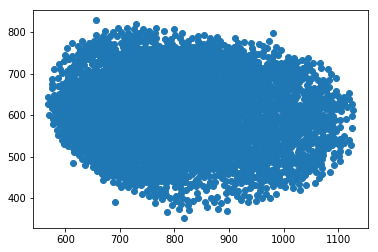

In [14]:
fig, ax = plt.subplots()
ax.scatter(df_oneframe_check['x'], df_oneframe_check['y'])

In [15]:
roi_condition = ((df_linked['x'] < roi_center_x + roi_size) &
                 (df_linked['y'] < roi_center_y + roi_size) & 
                 (df_linked['y'] > roi_center_y - roi_size) & 
                 (df_linked['y'] > roi_center_y - roi_size))

In [16]:
df_roi = df_linked[roi_condition]

In [17]:
df_roi.size

803054

In [18]:
df_linked.size

13723549

In [19]:
particles_listing = np.unique(df_roi['particle'])

In [20]:
type(particles_listing)

numpy.ndarray

In [21]:
particles_listing

array([  324,   325,   326,   327,   331,   335,   342,   344,   345,
         352,   353,   354,   355,   356,   357,   360,   364,   374,
         384,   385,   393,   398,   401,   403,   412,   413,   414,
         415,   416,   417,   418,   419,   421,   423,   430,   431,
         432,   433,   434,   435,   436,   441,   445,   446,   453,
         454,   461,   463,   464,   470,   471,   472,   473,   479,
         480,   481,   568,  1294,  1725,  1943,  1944,  1945,  1946,
        1947,  1950,  1951,  1956,  1957,  1959,  1961,  1963,  1964,
        1965,  1966,  1969,  1970,  1971,  1989,  1991,  1992,  1997,
        1998,  1999,  2000,  2001,  2002,  2005,  2006,  2007,  2010,
        2011,  2012,  2018,  2019,  2020,  2021,  2024,  2034,  2035,
        2036,  2040,  2051,  2064,  2065,  2066,  2072,  2074,  2080,
        2084,  2093,  2098,  2103,  2105,  2106,  2107,  2112,  2113,
        2114,  2120,  2121,  2122,  2123,  2125,  2126,  2133,  2134,
        2135,  2141,

In [22]:
len(particles_listing)

338

In [23]:
traj_test = df_roi[df_roi['particle'] == 113]

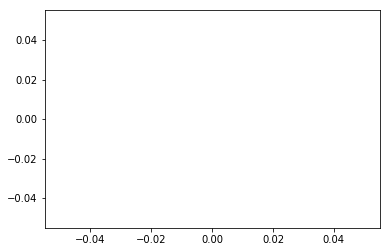

In [24]:
fig, ax = plt.subplots()
ax.plot(traj_test['x'], traj_test['y'])


In [25]:
arr_traj_lengths = np.empty(len(particles_listing))

In [26]:
for i in range(0, len(particles_listing)):
    cur_len = len(df_roi[df_roi['particle'] == particles_listing[i]])
    arr_traj_lengths[i] = cur_len
               

In [27]:
m_t_len = np.max(arr_traj_lengths)
m_t_len

764.0

In [28]:
pd_traj_len = pd.DataFrame({'particle':particles_listing, 'tr_len':arr_traj_lengths})

In [29]:
pd_traj_len.head()

,particle,tr_len
0,324,669.0
1,325,5.0
2,326,409.0
3,327,764.0
4,331,32.0


In [30]:
pd_traj_len.sort_values(by = 'tr_len', ascending = False, inplace = True)

In [31]:
pd_traj_len.head(20)

,particle,tr_len
169,2245,764.0
57,1294,764.0
85,2002,764.0
84,2001,764.0
135,2159,764.0
136,2161,764.0
81,1998,764.0
80,1997,764.0
79,1992,764.0
78,1991,764.0


In [32]:
traj_test = df_roi[df_roi['particle'] == 1799].copy()
N = len(traj_test['x'])

In [33]:
#Defining butterworth highpass filter
def butter_highpass(cutoff, fs, order=2):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

#Function to apply highpass filter
def butter_highpass_filter(data, cutoff, fs, order=2):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

In [34]:
def get_spectrum_drift(arr_t, arr_sig):
    #slope, intercept = np.polyfit(arr_t, arr_sig, 1)
    a, b, c = np.polyfit(arr_t, arr_sig, 2)
    #a, b, c, d = np.polyfit(arr_t, arr_sig, 3)
    arr_sig_nodrift = arr_sig - (a * arr_t * arr_t + b * arr_t + c)
    #arr_sig_nodrift = arr_sig - (a * arr_t * arr_t * arr_t + b * arr_t * arr_t + c * arr_t + d)
    arr_intens = np.fft.fft(arr_sig_nodrift)
    dt = arr_t[1] - arr_t[0]
    N = len(arr_t)
    #print(N)
    arr_freqs = np.fft.fftfreq(N, dt)[:N//2]    
    return arr_freqs, arr_intens

In [35]:
def get_spectrum_PSD(arr_t, arr_sig):
    #slope, intercept = np.polyfit(arr_t, arr_sig, 1)
    a, b, c = np.polyfit(arr_t, arr_sig, 2)
    #a, b, c, d = np.polyfit(arr_t, arr_sig, 3)
    arr_sig_nodrift = arr_sig - (a * arr_t * arr_t + b * arr_t + c)
    #arr_sig_nodrift = arr_sig - (a * arr_t * arr_t * arr_t + b * arr_t * arr_t + c * arr_t + d)
    dt = arr_t[1] - arr_t[0]
    fs = 1.0 / dt
    arr_freqs, arr_PSD = signal.welch(arr_sig, fs, nperseg = 500)
    return arr_freqs, arr_PSD

In [36]:
def get_spectrum(arr_t, arr_sig):
    arr_sig_nomean = arr_sig - np.mean(arr_sig)
    arr_intens = np.fft.fft(arr_sig_nomean)
    dt = arr_t[1] - arr_t[0]
    N = len(arr_t)
    arr_freqs = np.fft.fftfreq(N, dt)[:N//2]    
    return arr_freqs, arr_intens

In [37]:
def get_spectrum_connor(arr_t, arr_sig):
    arr_sig_nomean = arr_sig - np.mean(arr_sig)
    dt = arr_t[1] - arr_t[0]
    fps = 1.0 / dt
    arr_filtered = butter_highpass_filter(arr_sig_nomean,5.0,fps)
    arr_intens = np.fft.fft(arr_filtered)
    arr_freqs = np.fft.fftfreq(N, dt)[:N//2]
    return arr_freqs, arr_intens    

In [38]:
def get_spectrum_connor_exact(arr_t, arr_sig):
    arr_sig_nomean = arr_sig - np.mean(arr_sig)
    dt = arr_t[1] - arr_t[0]
    fps = 1.0 / dt
    arr_filtered = butter_highpass_filter(arr_sig_nomean,5.0,fps)
    arr_intens = np.fft.fft(arr_filtered)
    arr_intens = np.fft.fftshift(arr_intens)
    #arr_freqs = np.fft.fftfreq(N, dt)[:N//2]
    arr_freqs = np.arange(-fps/2,fps/2,1/(dt * len(arr_sig)))
    return arr_freqs, arr_intens    

In [39]:
def get_spectrum_drift_connor(arr_t, arr_sig):
    #slope, intercept = np.polyfit(arr_t, arr_sig, 1)
    a, b, c = np.polyfit(arr_t, arr_sig, 2)
    #a, b, c, d = np.polyfit(arr_t, arr_sig, 3)
    arr_sig_nodrift = arr_sig - (a * arr_t * arr_t + b * arr_t + c)
    dt = arr_t[1] - arr_t[0]
    fps = 1.0 / dt
    arr_filtered = butter_highpass_filter(arr_sig_nodrift,5.0,fps)
    arr_intens = np.fft.fft(arr_filtered)
    arr_freqs = np.fft.fftfreq(N, dt)[:N//2]
    return arr_freqs, arr_intens    

In [40]:
df_long_traj = pd_traj_len[pd_traj_len['tr_len'] == m_t_len]
arr_p = np.array(df_long_traj['particle'])
med_spectrum = np.zeros(math.floor(m_t_len / 2))


In [41]:
len(arr_p)

106

In [42]:
maxpn = min([36, len(arr_p)])

C:\conda\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


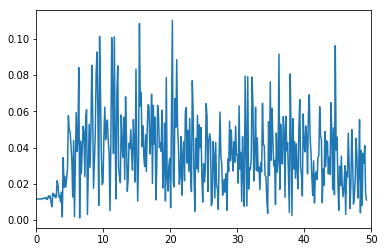

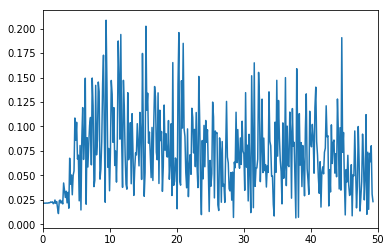

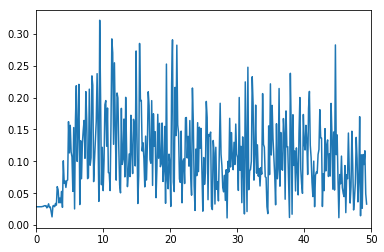

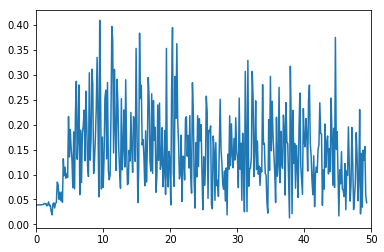

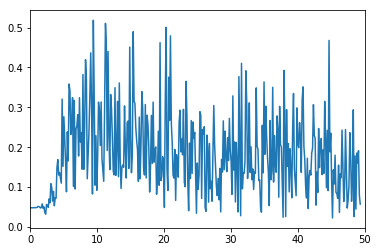

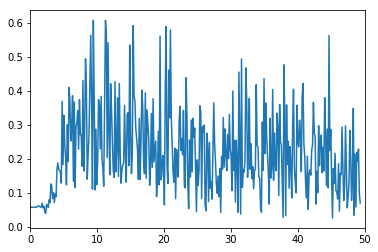

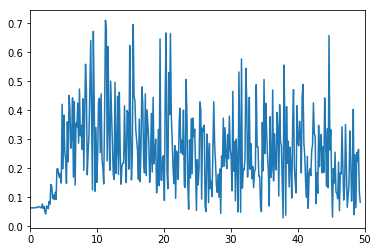

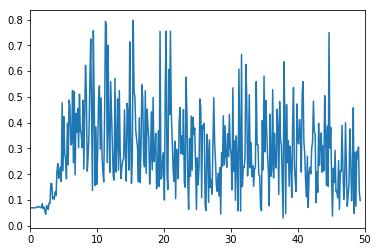

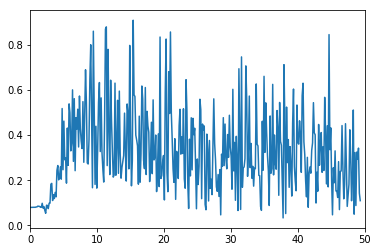

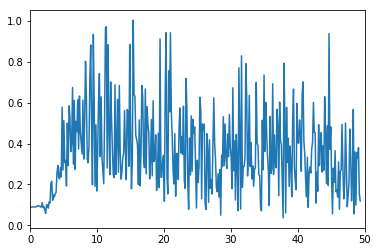

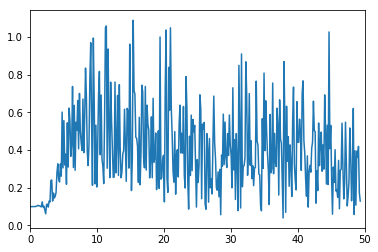

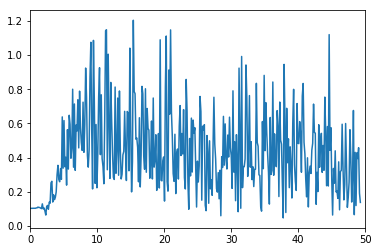

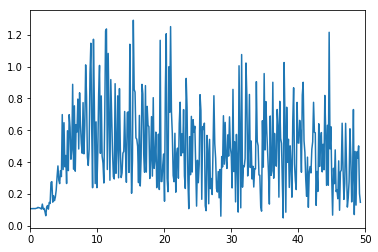

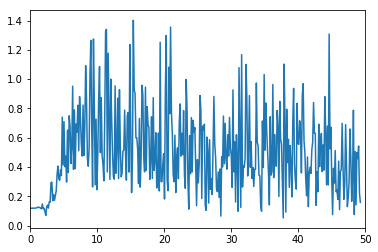

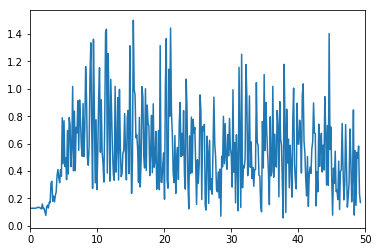

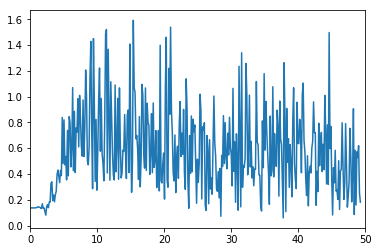

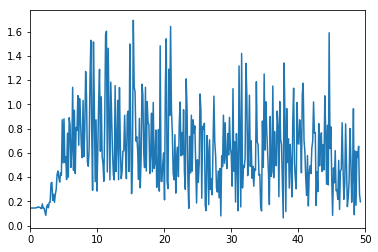

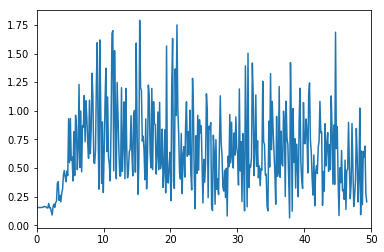

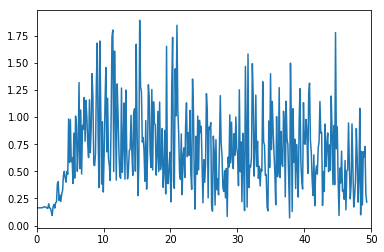

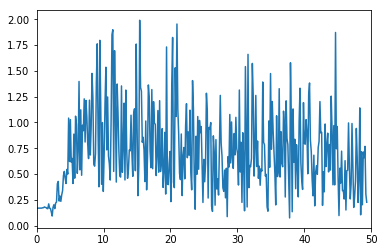

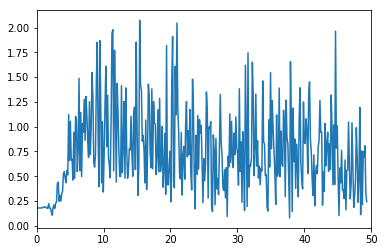

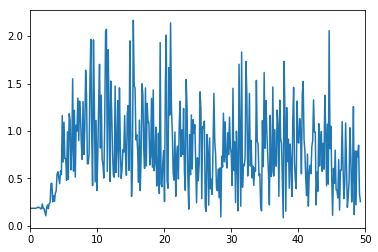

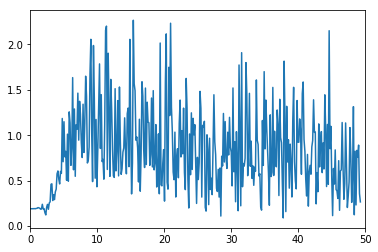

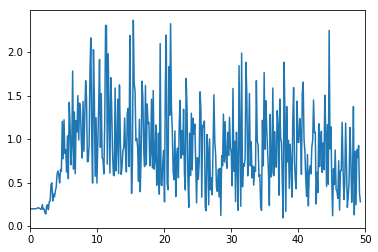

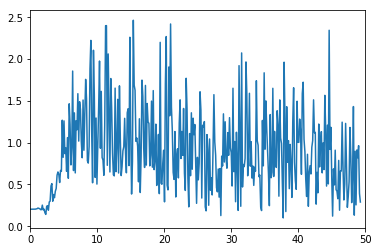

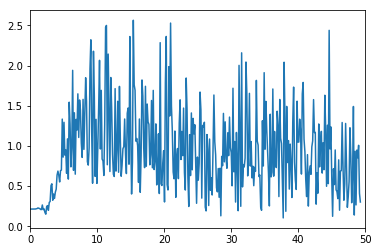

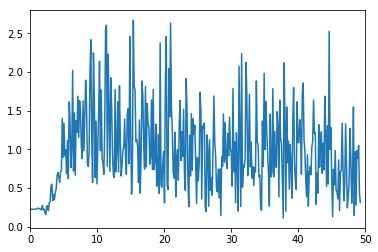

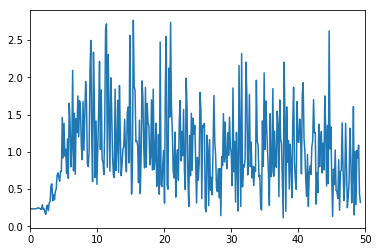

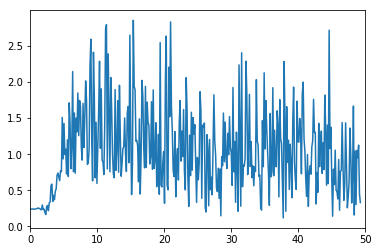

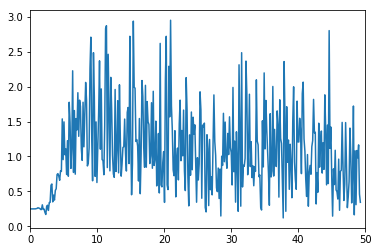

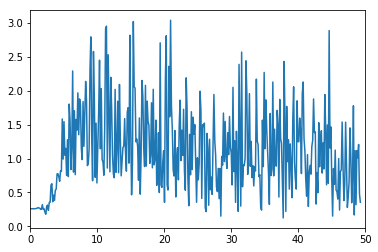

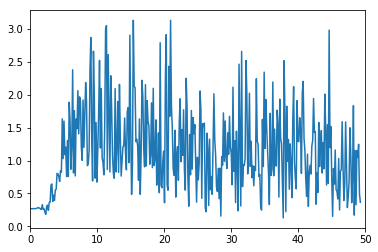

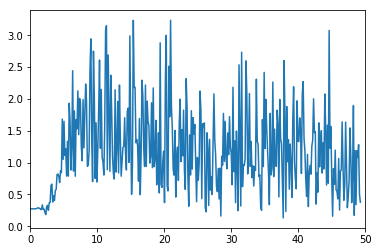

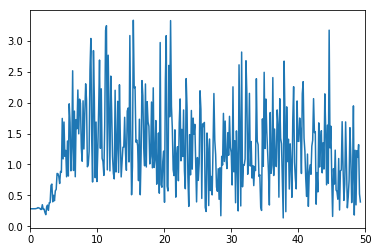

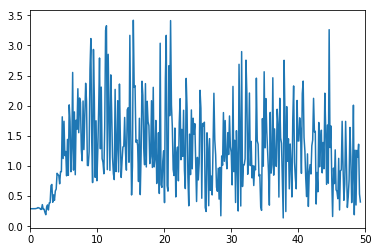

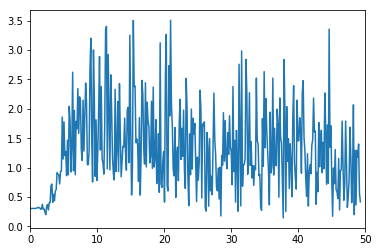

In [43]:
for i in range(0,maxpn):
    pname_i = arr_p[i]
    traj_i = df_roi[df_roi['particle'] == arr_p[i]].copy()
    N = len(traj_i['x'])
    traj_i['x_rfcm'] = traj_i['x'] - traj_i['x_CM']
    traj_i['y_rfcm'] = traj_i['y'] - traj_i['y_CM']
    arr_time_i = np.linspace(0.0, 1.0 / fps * N, N)
    arr_freqs_i, arr_intens_i = get_spectrum_connor(arr_time_i, traj_i['x_rfcm'])
    fig_i, ax_i = plt.subplots()
    ax_i.set_xlim(0, 50)
    arr_abs_intens = 2.0 / N * np.abs(arr_intens_i[0:N//2])
    med_spectrum += arr_abs_intens
    #arr_norm_intens = ((arr_abs_intens - np.min(arr_abs_intens)) / 
    #                  (np.max(arr_abs_intens) - np.min(arr_abs_intens)))
    #arr_savg = savgol_filter(arr_abs_intens, 3, 2)    
    #ax_i.plot(arr_freqs_i, arr_norm_intens)
    ax_i.plot(arr_freqs_i, med_spectrum)
    df_spectrum_i = pd.DataFrame({'freq':arr_freqs_i, 'intens': arr_abs_intens})
    fname_i = folderPath + r'\outputs'  + outfname + r'x_graph_' + str(i) + r'_p' + str(pname_i)
    fname_csv_i = fname_i + r'.csv'
    fname_png_i = fname_i + r'.png'
    df_spectrum_i.to_csv(fname_csv_i, index = False)
    fig_i.savefig(fname_png_i)

In [44]:
fname_sum = folderPath + r'\outputs'  + outfname + r'x_graph_' + 'sum_36_particles'
fname_csv_sum = fname_sum + r'.csv'
fname_png_sum = fname_sum + r'.png'
df_spectrum_sum = pd.DataFrame({'freq':arr_freqs_i, 'sum_intens': med_spectrum})
df_spectrum_sum.to_csv(fname_csv_sum, index = False)